# NYPD Felonies Project, Firas Mouasher

As suggested by my chosen dataset’s title, “New York City Major Felony Incidents”, my dataset provides various data on major felonies that took place in New York City at the incident level. I plan on focusing on the New York Police Department. I sought to provide the New York Police Department with information on the different types of crimes that could occur at any given time and place. For the purposes of this project and the subsequent analysis, I plan to focus specifically on Manhattan and its respective precincts.

The code below imports the necessary modules.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings

warnings.filterwarnings('ignore')
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')

The code below loads the dataset "NYPD_Dataset.csv" into the dataframe. Then, the data.head() function shows the first five rows of the dataset.

In [2]:
data = pd.read_csv('./NYPD_Dataset.csv')
data.head()

,objectid,identifier,occurrence_date,day_of_week,occurrence_month,occurrence_day,occurrence_year,occurrence_hour,compstat_month,compstat_day,...,borough,jurisdiction,xcoordinate,ycoordinate,location_1_zip,location_1_city,location_1_state,location_1_address,serialid,serial_d7ee3749_3dad_4a46_83be_afbc9e2cdd88
0,793151,c86693de,2012-07-09T12:00:00+00:00,Monday,Jul,9.0,2012.0,12.0,8,10,...,MANHATTAN,N.Y. POLICE DEPT,982559,199560,NaN,NaN,NaN,NaN,793151,793150
1,795819,8409d5ce,2011-10-28T11:00:00+00:00,Friday,Oct,28.0,2011.0,11.0,10,29,...,MANHATTAN,N.Y. POLICE DEPT,986667,205561,NaN,NaN,NaN,NaN,795819,795818
2,796506,880efb7b,2012-10-16T09:00:00+00:00,Tuesday,Oct,16.0,2012.0,9.0,10,17,...,MANHATTAN,N.Y. POLICE DEPT,992664,229381,NaN,NaN,NaN,NaN,796506,796505
3,794302,158643a6,2012-11-24T03:30:00+00:00,Saturday,Nov,24.0,2012.0,3.0,11,24,...,MANHATTAN,N.Y. POLICE DEPT,984440,204596,NaN,NaN,NaN,NaN,794302,794301
4,793156,5ebbe875,2012-07-09T12:00:00+00:00,Monday,Jul,9.0,2012.0,12.0,8,14,...,MANHATTAN,N.Y. HOUSING POLICE,997541,226681,NaN,NaN,NaN,NaN,793156,793155


The below function shows the column headings and the datatypes of the cells pertaining to each column.

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287812 entries, 0 to 287811
Data columns (total 25 columns):
objectid                                       287812 non-null int64
identifier                                     287812 non-null object
occurrence_date                                287737 non-null object
day_of_week                                    287768 non-null object
occurrence_month                               287768 non-null object
occurrence_day                                 287768 non-null float64
occurrence_year                                287737 non-null float64
occurrence_hour                                287737 non-null float64
compstat_month                                 287812 non-null int64
compstat_day                                   287812 non-null int64
compstat_year                                  287812 non-null int64
offense                                        287812 non-null object
offense_classification                         287

# Data Cleaning

When looking through the data, I found both empty cells and NaN(null-value/invalid) cells. I also removed unnecessary columns from the data (such as location_1_zip and serialid). The first two columns in the dataset are objectid and identifier, both of which serve the same purpose (primary key). To eliminate any redundancy in the dataset, I dropped the identifier column and stuck with the objectid column as the primary key column. The below functions perform the cleaning mentioned in this markdown.

In [4]:
def cleaning_data(data):
    # useful features
    features = ['objectid','occurrence_date','day_of_week','occurrence_month','occurrence_day','occurrence_year','occurrence_hour'
               , 'compstat_month','compstat_day','compstat_year','offense','offense_classification','sector','precinct','jurisdiction'
               , 'xcoordinate','ycoordinate']
    # select useful featuers from original data
    clean_data = data[features]
    return clean_data
    
data = cleaning_data(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287812 entries, 0 to 287811
Data columns (total 17 columns):
objectid                  287812 non-null int64
occurrence_date           287737 non-null object
day_of_week               287768 non-null object
occurrence_month          287768 non-null object
occurrence_day            287768 non-null float64
occurrence_year           287737 non-null float64
occurrence_hour           287737 non-null float64
compstat_month            287812 non-null int64
compstat_day              287812 non-null int64
compstat_year             287812 non-null int64
offense                   287812 non-null object
offense_classification    287812 non-null object
sector                    281096 non-null object
precinct                  287806 non-null float64
jurisdiction              287812 non-null object
xcoordinate               287812 non-null int64
ycoordinate               287812 non-null int64
dtypes: float64(4), int64(6), object(7)
memory usage: 37.3

# Complementary Dataset (NYPD Population & NYPD Felony Type)

In order to analyze the felony crimes of Manhattan, I provided a supplementary dataset that provides insight on the population of Manhattan's 12 community districts. This could provide insight because as population increases in a given area, so does the number of felonies that occur in that area. The code below attaches the NYPD population dataset to my chosen, original dataset. Here is the link to the new dataset:
link (https://data.cityofnewyork.us/dataset/New-York-City-Population-By-Boroughs/6fhq-y2mg?defaultRender=page). 

The code below loads the population dataset, filters Manhattan on the district’s field, and shows the first five rows with respect to Manhattan.

In [5]:
pop_data = pd.read_csv('./New_York_City_Population_By_Community_Districts.csv')
man_mask = pop_data['Borough'] == 'Manhattan'
pop_data = pop_data[man_mask]
pop_data.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
30,Manhattan,1,"Battery Park City, Tribeca",7706,15918,25366,34420,60978
31,Manhattan,2,"Greenwich Village, Soho",84337,87069,94105,93119,90016
32,Manhattan,3,"Lower East Side, Chinatown",181845,154848,161617,164407,163277
33,Manhattan,4,"Chelsea, Clinton",83601,82164,84431,87479,103245
34,Manhattan,5,Midtown Business District,31076,39544,43507,44028,51673


In order to analyze the felony crimes of Manhattan, I provided a supplementary dataset that provides insight on the frequency of seven major felonies in New York City. This allowed me to analyze the findings pertaining to the felonies listed in this supplementary dataset. Further, the time frame of this dataset spans from 2002-2018, which allows me to analyze historical trends, uncover patterns, and potentially forecast findings or trends for years not covered in the original dataset. Here is the link to the Dataset:

Link: https://data.cityofnewyork.us/Social-Services/nypd-7-major-felony-incidents/k384-xu3q/data 
The code below loads the supplementary dataset.

In [6]:

major_fel_data = pd.read_csv('seven_major_felonies.csv')
major_fel_data.head()

,OFFENSE,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,MURDER & NON-NEGL. MANSLAUGHTER,673,649,587,597,570,539,596,496,523,471,536,515,419,335,333,352,335,292,295
1,RAPE,"2,068","1,981","2,144","2,070","1,905","1,858",1525,1351,1299,1205,1373,1420,1445,1378,1352,1438,1438,1449,1794
2,ROBBERY,"32,562","28,202","27,229","25,989","24,373","24,722",23739,21809,22401,18601,19486,19717,20144,19128,16539,16931,15500,13956,12913
3,FELONY ASSAULT,"25,924","23,453","21,147","19,139","18,622","17,750",17309,17493,16284,16773,16956,18482,19381,20297,20207,20270,20847,20052,20208
4,BURGLARY,"38,352","32,763","31,275","29,110","26,976","24,117",23143,21762,20725,19430,18600,18720,19168,17429,16765,15125,12990,12083,11687


# Data Analysis

The code listed below outlines the timeframe for when the felonies began and ended (2000-2018) with respect to the dataset. This will allow me to know the years to be analyzed.

In [18]:
data['occurrence_date'] = pd.to_datetime(data['occurrence_date'])

In [19]:
print("The occurrence_date is between " + str(min(data['occurrence_date'])) + " and, " + str(max(data['occurrence_date'])))

The occurrence_date is between 1905-10-20 11:30:00+00:00 and, 2015-12-31 23:00:00+00:00


### Number of Felonies Per Year

<Figure size 432x288 with 0 Axes>

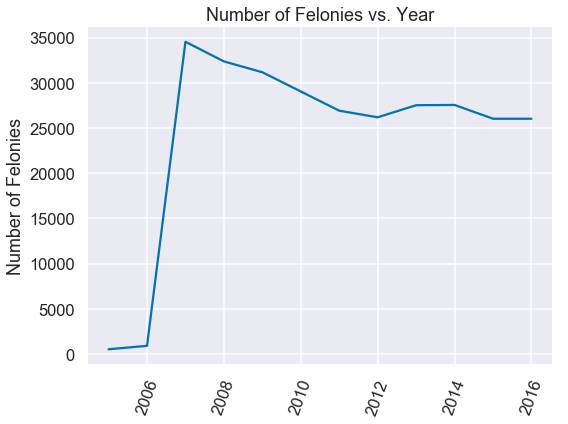

In [9]:
start_dates = ['10-20-1905', '01-01-2005','01-01-2006', '01-01-2007', '01-01-2008', '01-01-2010', '01-01-2011', '01-01-2012', '01-01-2013', '01-01-2014', '01-01-2015']
end_dates = ['01-01-2005','01-01-2006', '01-01-2007', '01-01-2008', '01-01-2009', '01-01-2011', '01-01-2012', '01-01-2013', '01-01-2014', '01-01-2015' ,'01-01-2016']
decade_dfs = []
num_crime_list = []
plt.clf()
for i in range(len(start_dates)):
    mask = (data['occurrence_date'] > start_dates[i]) & (data['occurrence_date'] <= end_dates[i])
    df = data.loc[mask]
    decade_dfs += [df]
    num_crimes = len(df.index)
    num_crime_list += [num_crimes]

# plot based on year
time = [datetime.strptime(s,'%m-%d-%Y') for s in end_dates]
locator = mdates.AutoDateLocator(interval_multiples=True)
fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.plot(time, num_crime_list)
ax.tick_params(axis='x', rotation=70)
plt.ylabel('Number of Felonies')
plt.title("Number of Felonies vs. Year")
plt.show()


As seen from the graph above, the felonies were recorded properly for the years 2007 through 2016, and the trend shows a relatively steady decline in the number of felonies each year over the period 2007 through 2016. There was a slight increase in the number of felonies from 2012 through 2013, however, but this is still a much lower overall volume of felonies relative to the 2007 high of ~35,000.


### Sum of Number of Felonies Per Month for Years 2007 Through 2016

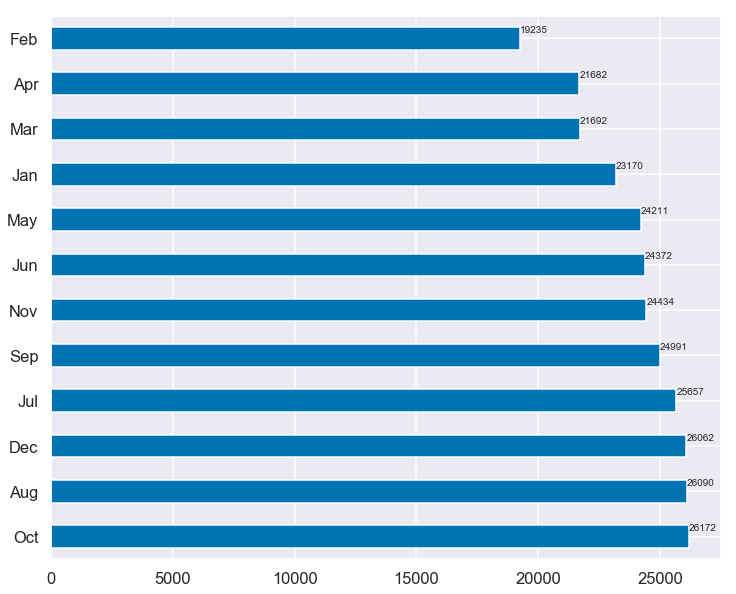

In [10]:
month_plot = data['occurrence_month'].value_counts(sort=True).plot(kind='barh', figsize=(12,10))

# create a list to collect the plt.patches data
totals1 = []

# find the values and append to list
for i in month_plot.patches:
    totals1.append(i.get_width())

# set individual bar labels using above list
total1 = sum(totals1)

# set individual bar labels using above list
for i in month_plot.patches:
    # get_width pulls left or right; get_y pushes up or down
    month_plot.text(i.get_width()+10.0, i.get_y()+.38, str(i.get_width()))

### Sum of the Number of Felonies Per Week from 2007 through 2016

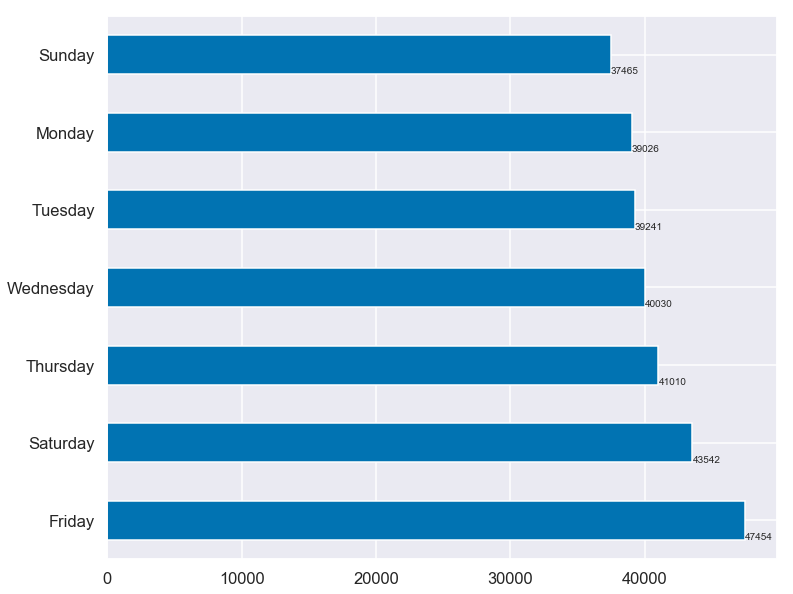

In [11]:
week_plot = data['day_of_week'].value_counts(sort=True).plot(kind='barh', figsize=(12,10))

# create a list to collect the plt.patches data
totals1 = []

# find the values and append to list
for i in week_plot.patches:
    totals1.append(i.get_width())

# set individual bar labels using above list
total1 = sum(totals1)

# set individual bar labels using above list
for i in week_plot.patches:
    # get_width pulls left or right; get_y pushes up or down
    week_plot.text(i.get_width(), i.get_y(), str(i.get_width()))

### Number of Felonies Per Jurisdiction

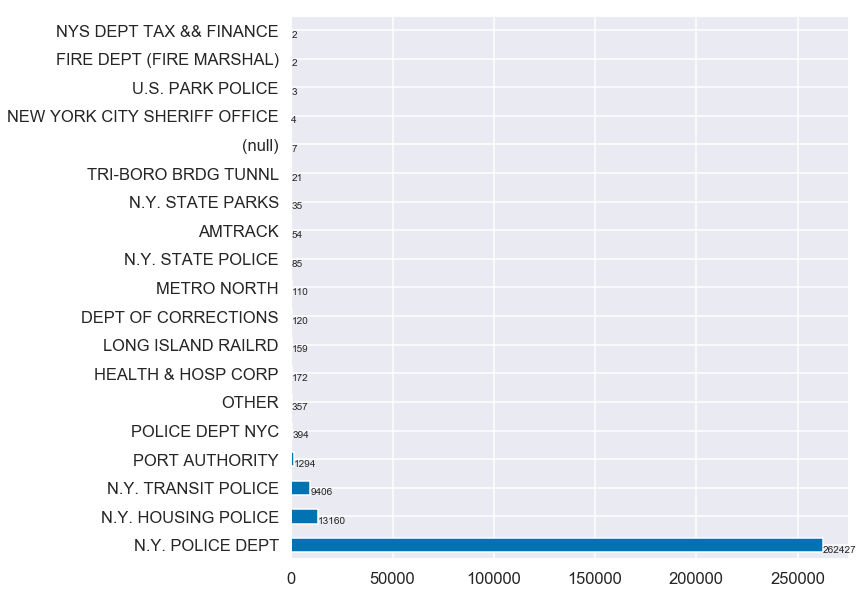

In [12]:
jur_plot = data['jurisdiction'].value_counts(sort=True).plot(kind='barh', figsize=(10,10))

# create a list to collect the plt.patches data
totals1 = []

# find the values and append to list
for i in jur_plot.patches:
    totals1.append(i.get_width())

# set individual bar labels using above list
total1 = sum(totals1)

# set individual bar labels using above list
for i in jur_plot.patches:
    # get_width pulls left or right; get_y pushes up or down
    jur_plot.text(i.get_width(), i.get_y(), str(i.get_width()))

### Number of Felonies Per Offense Type

The code below shows the frequency of the felonies in the original dataset from 2007 through 2016 in Manhattan, ranking them from most frequent to least frequent. Grand larceny, or theft, at over ~160,000 felonies, is more prevalent than all the other offense types combined. Robbery, burglary, and assault are similar in volume and are the next three categories of felonies that come after grand larceny. Their volume is ~40,000 felonies. The offense type with the lowest volume is not surprisingly manslaughter, which is significantly lower in volume than the other 6 major offense types.

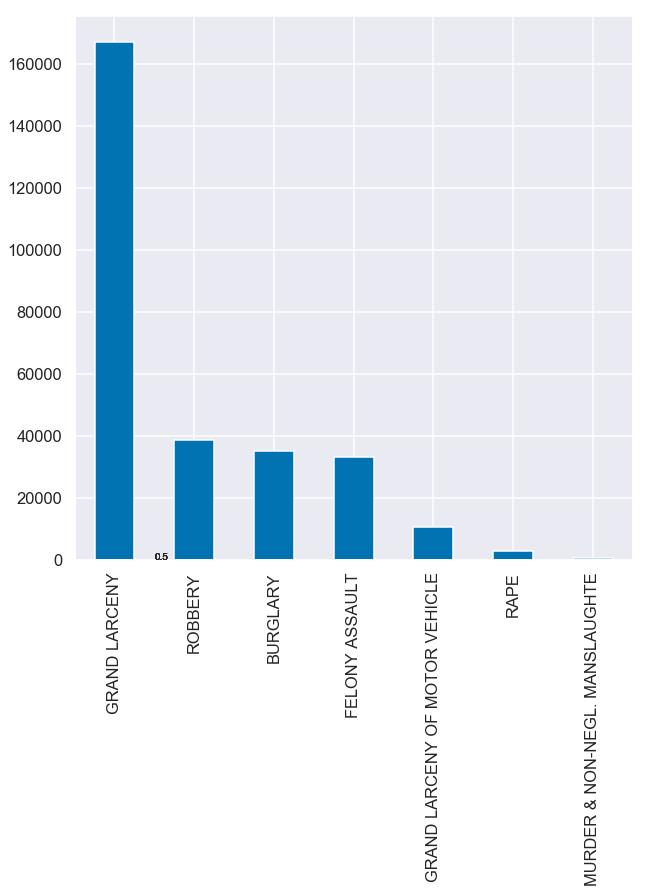

In [13]:
offense_plot = data['offense'].value_counts(sort=True).plot(kind='bar', figsize=(10,10))

# create a list to collect the plt.patches data
totals1 = []

# find the values and append to list
for i in offense_plot.patches:
    totals1.append(i.get_width())

# set individual bar labels using above list
total1 = sum(totals1)

# set individual bar labels using above list
for i in offense_plot.patches:
    # get_width pulls left or right; get_y pushes up or down
    offense_plot.text(i.get_width(), i.get_y(), str(i.get_width()))

### Number of Felonies Per Precinct

The code below will reveal a bar chart that shows the number of felonies per precinct in Manhattan from 2007 through 2016. It is clear from the output of the bar chart that there are certain precincts that historically show a higher volume of felonies over the historical period 2007 through 2016. For example, precinct 14 is historically much more likely to have a felony than precinct 22, which is the precinct with the lowest volume of felonies. It is not surprising to note that those precincts with the highest number of felonies are adjacent to each other in terms of geographical location within Manhattan. These precincts (13, 14, 18, 19) are also located in the center of Manhattan.

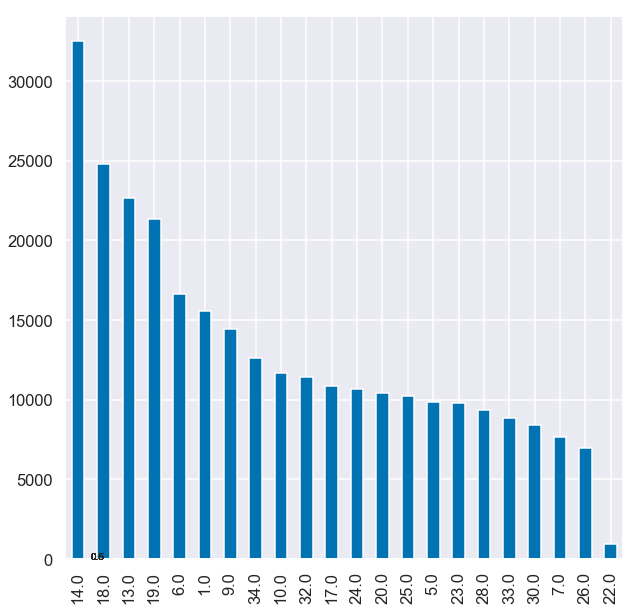

In [14]:
#data.plot.scatter('precinct', 'offense')
precinct_plot = data['precinct'].value_counts(sort=True).plot(kind='bar', figsize=(10,10))

# create a list to collect the plt.patches data
totals1 = []

# find the values and append to list
for i in precinct_plot.patches:
    totals1.append(i.get_width())

# set individual bar labels using above list
total1 = sum(totals1)

# set individual bar labels using above list
for i in precinct_plot.patches:
    # get_width pulls left or right; get_y pushes up or down
    precinct_plot.text(i.get_width(), i.get_y(), str(i.get_width()))

### X and Y Coordinates (Spacial Coordination of Felonies)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


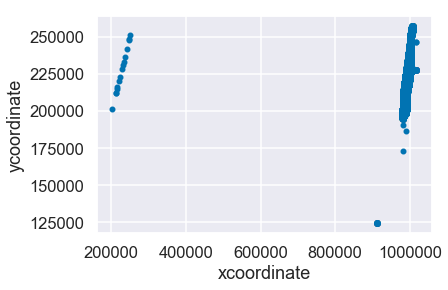

In [15]:
data.plot.scatter('xcoordinate', 'ycoordinate')

It seems the scatterplot above does not provide much insight. Manhattan is not square shaped as with the scatterplot above. Although, I might use X and Y coordinates to give more accurate insight to the location of felonies in another manner.

### Heat Map --> Number and Type of Felony Per Precinct
The heat map provides another visual indication of the volume of felonies by offense type that occur in each precinct. For example, grand larceny occurs with the highest frequency in precinct 14, which aligns to our bar chart above that shows precinct 14 with the highest volume of felonies across all the other precincts within Manhattan. By analyzing the heat map, one can now see that grand larceny is the offense type that is driving the volume of felonies within precinct 14. Burglary is also more common in precinct 14 than other precincts.

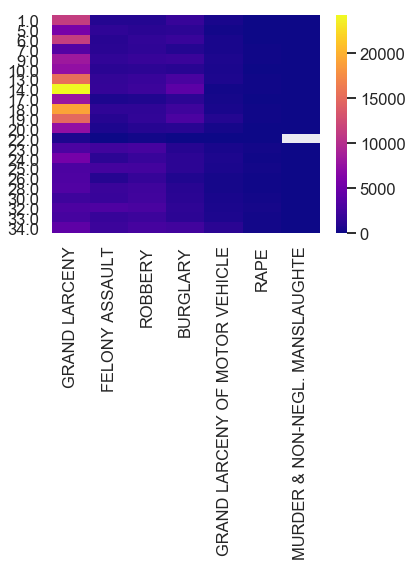

In [16]:
# creating relationship matrix
offense_type_list = data['offense'].unique()
precinct_list = data['precinct'].unique()
precinct_list = [x for x in precinct_list if ~np.isnan(x)]
#selects the values that are not null
precinct_list.sort()
#sorts precincts from lowest to highest
rel_dict = {}
for offense in offense_type_list :
    mask = data['offense'] == offense
    curr_offense = data[mask]
    pre_off_data = curr_offense['precinct'].value_counts(sort=True)
    rel_dict[offense]=pre_off_data

reldf = pd.DataFrame(rel_dict) 
sns.heatmap(reldf,cmap='plasma',xticklabels=offense_type_list,
        yticklabels=precinct_list)

